In [129]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

In [130]:
df=pd.read_csv("/content/AutoInsurance.csv")

In [131]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [132]:
df.shape

(9134, 24)

In [133]:
df=df.drop(["Customer","Effective To Date"],axis=1)

In [134]:
df.head()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [135]:

for col in df.select_dtypes(include=['object']).columns:
  print(f'{col}: {df[col].nunique()}')


State: 5
Response: 2
Coverage: 3
Education: 5
EmploymentStatus: 5
Gender: 2
Location Code: 3
Marital Status: 3
Policy Type: 3
Policy: 9
Renew Offer Type: 4
Sales Channel: 4
Vehicle Class: 6
Vehicle Size: 3


In [136]:
df.describe(include="all")

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
count,9134,9134.000000,9134,9134,9134,9134,9134,9134.000000,9134,9134,...,9134.000000,9134.000000,9134.000000,9134,9134,9134,9134,9134.000000,9134,9134
unique,5,NaN,2,3,5,5,2,NaN,3,3,...,NaN,NaN,NaN,3,9,4,4,NaN,6,3
top,California,NaN,No,Basic,Bachelor,Employed,F,NaN,Suburban,Married,...,NaN,NaN,NaN,Personal Auto,Personal L3,Offer1,Agent,NaN,Four-Door Car,Medsize
freq,3150,NaN,7826,5568,2748,5698,4658,NaN,5779,5298,...,NaN,NaN,NaN,6788,3426,3752,3477,NaN,4621,6424
mean,NaN,8004.940475,NaN,NaN,NaN,NaN,NaN,37657.380009,NaN,NaN,...,48.064594,0.384388,2.966170,NaN,NaN,NaN,NaN,434.088794,NaN,NaN
std,NaN,6870.967608,NaN,NaN,NaN,NaN,NaN,30379.904734,NaN,NaN,...,27.905991,0.910384,2.390182,NaN,NaN,NaN,NaN,290.500092,NaN,NaN
min,NaN,1898.007675,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,...,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,0.099007,NaN,NaN
25%,NaN,3994.251794,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,...,24.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,272.258244,NaN,NaN
50%,NaN,5780.182197,NaN,NaN,NaN,NaN,NaN,33889.500000,NaN,NaN,...,48.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,383.945434,NaN,NaN
75%,NaN,8962.167041,NaN,NaN,NaN,NaN,NaN,62320.000000,NaN,NaN,...,71.000000,0.000000,4.000000,NaN,NaN,NaN,NaN,547.514839,NaN,NaN


<Axes: xlabel='State', ylabel='count'>

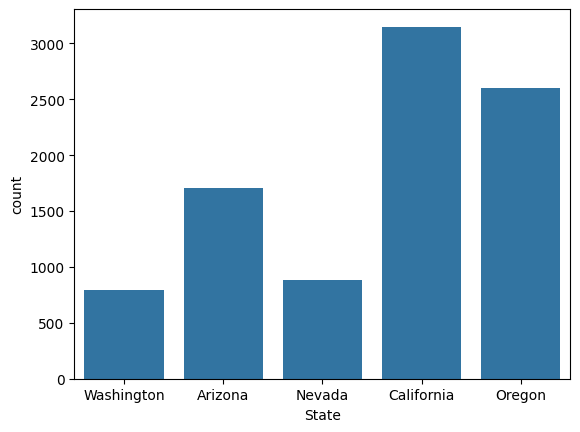

In [137]:
sns.countplot(x="State",data=df)

<Axes: xlabel='Customer Lifetime Value'>

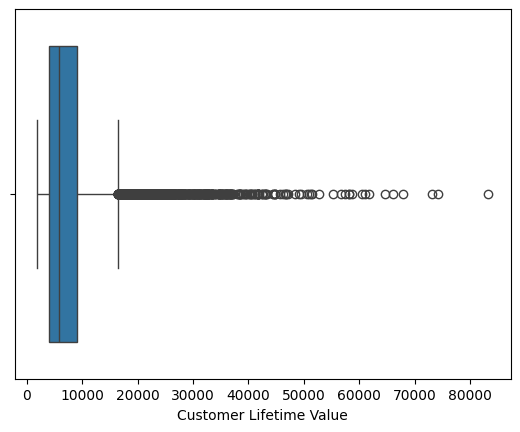

In [138]:
sns.boxplot(x="Customer Lifetime Value",data=df)

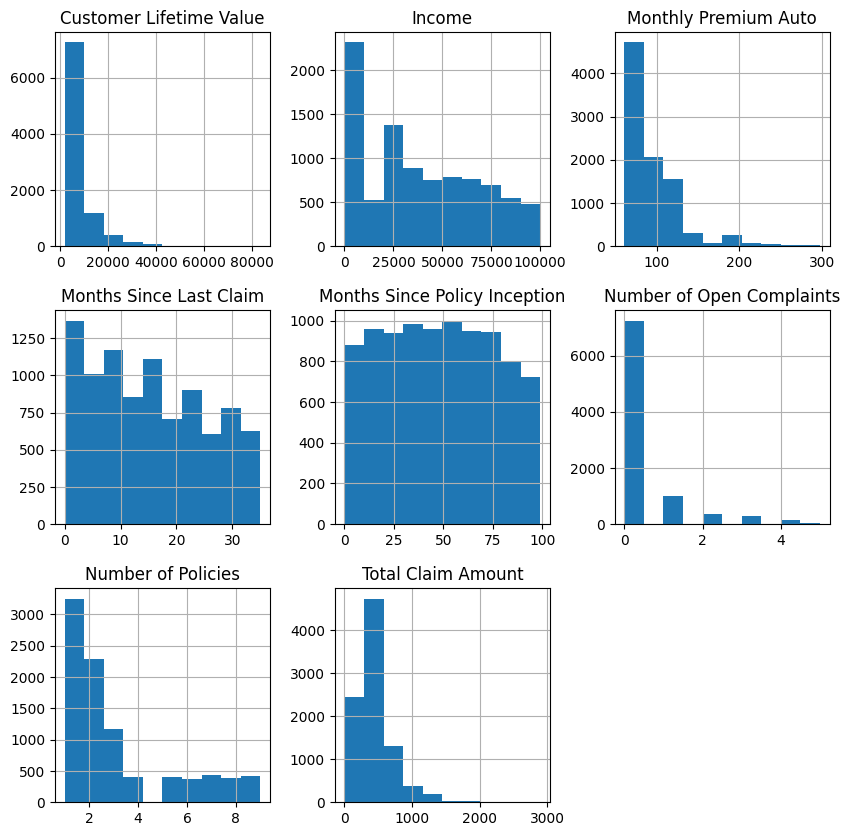

In [139]:
df.hist(figsize=(10,10))
plt.show()

In [140]:
df.skew(numeric_only=True)

,0
Customer Lifetime Value,3.032280
Income,0.286887
Monthly Premium Auto,2.123546
Months Since Last Claim,0.278586
Months Since Policy Inception,0.040165
Number of Open Complaints,2.783263
Number of Policies,1.253333
Total Claim Amount,1.714966


In [141]:
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
  if col != 'Customer Lifetime Value':  # Avoid plotting against itself
    fig = px.scatter(df, x=col, y='Customer Lifetime Value', title=f'CLV vs. {col}')
    fig.show()

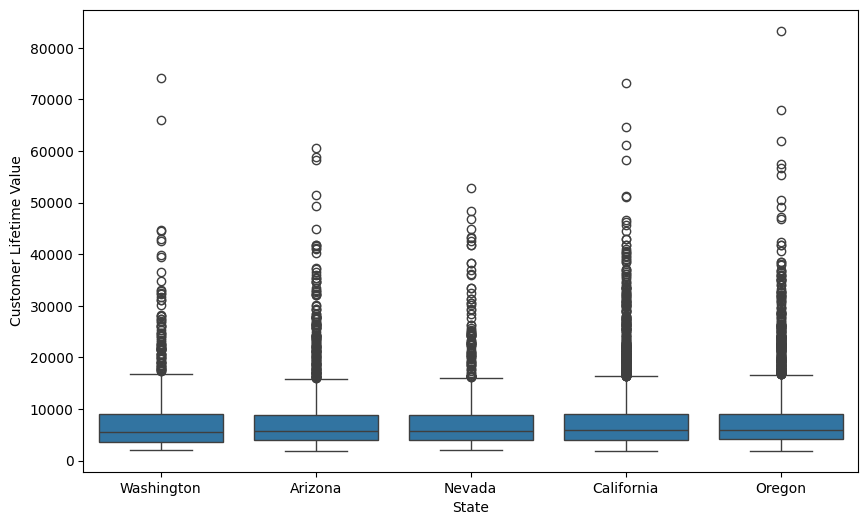

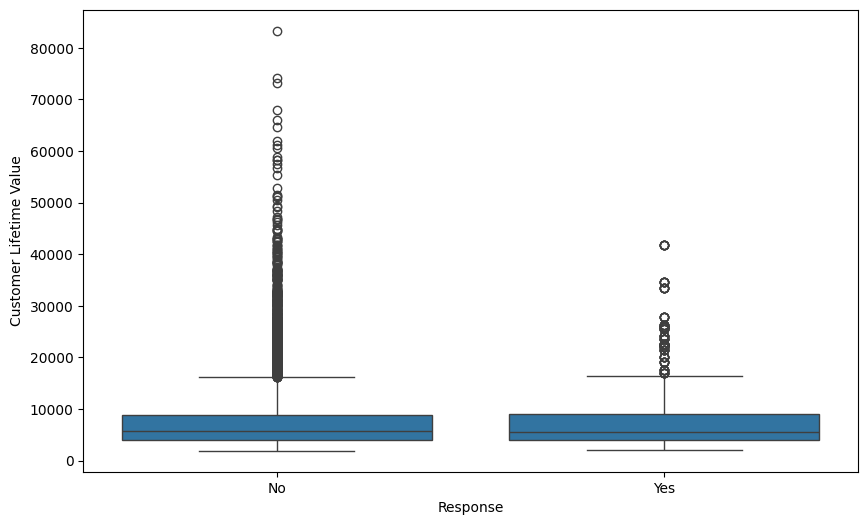

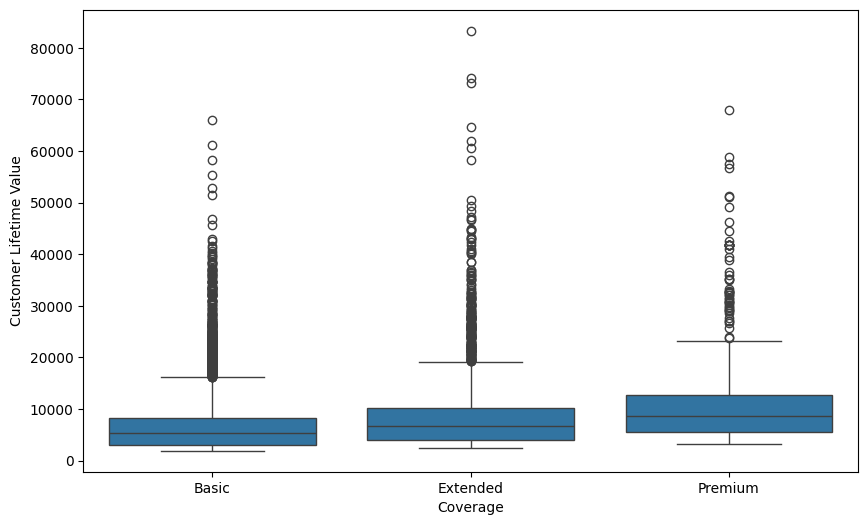

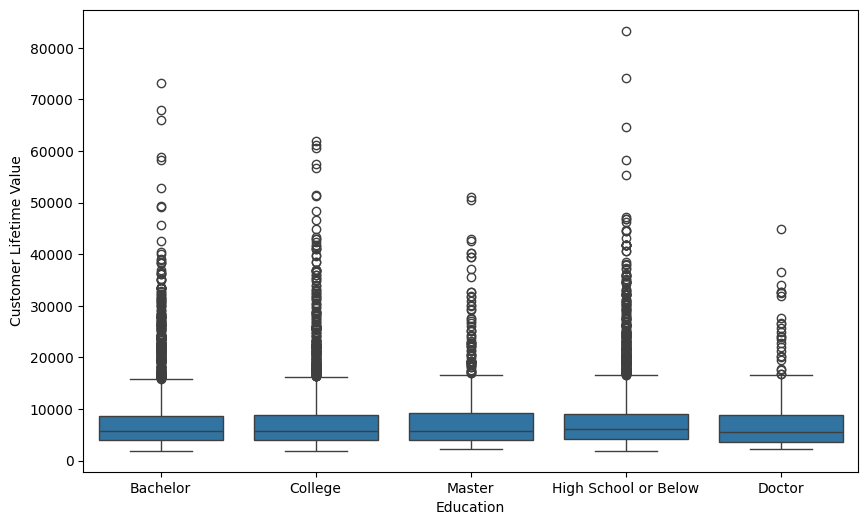

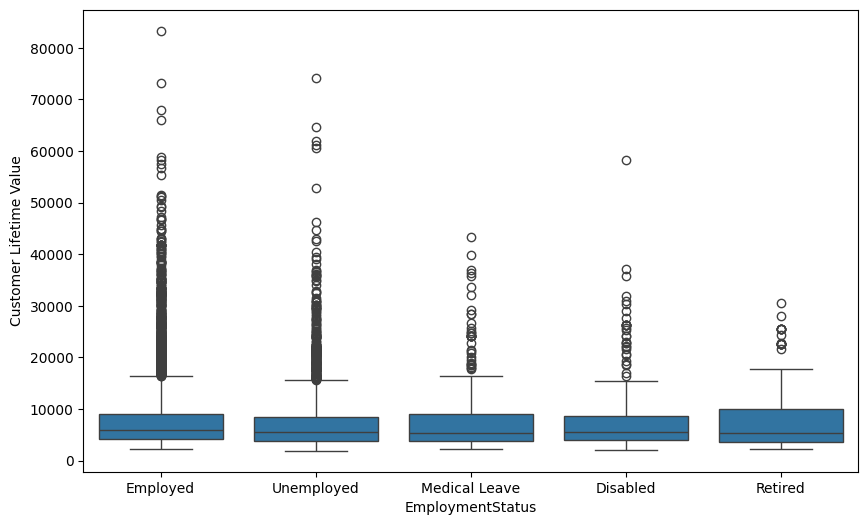

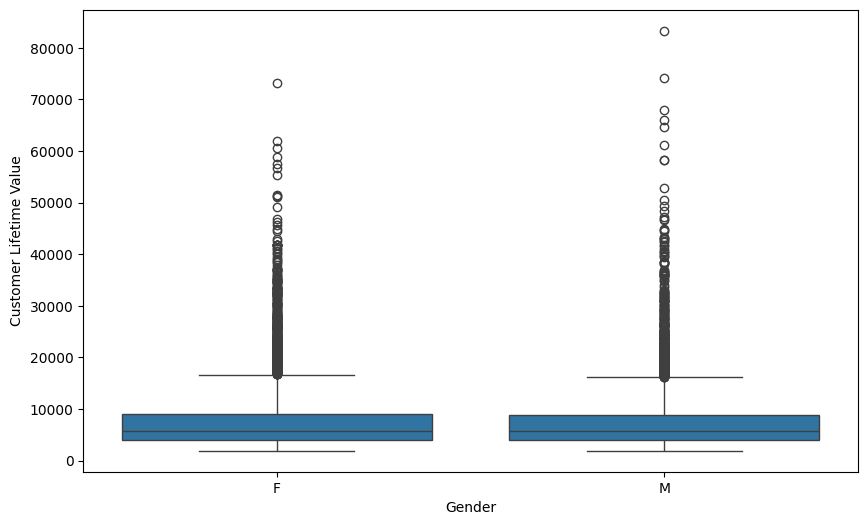

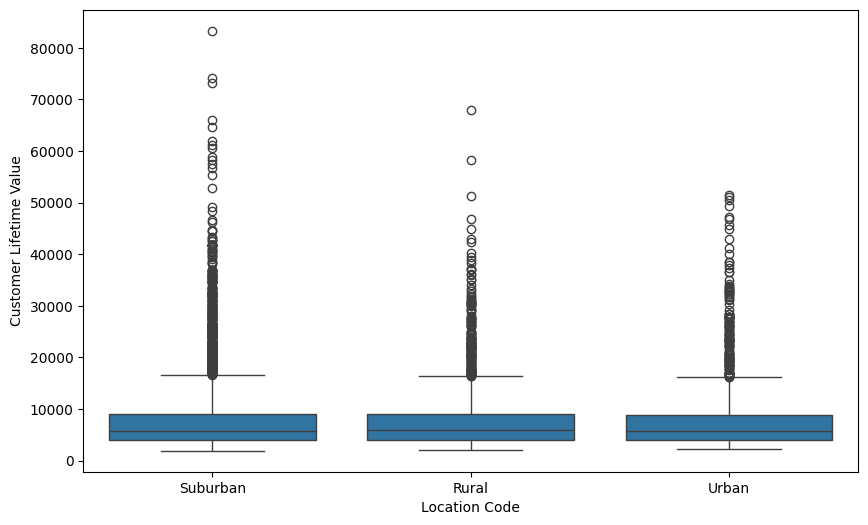

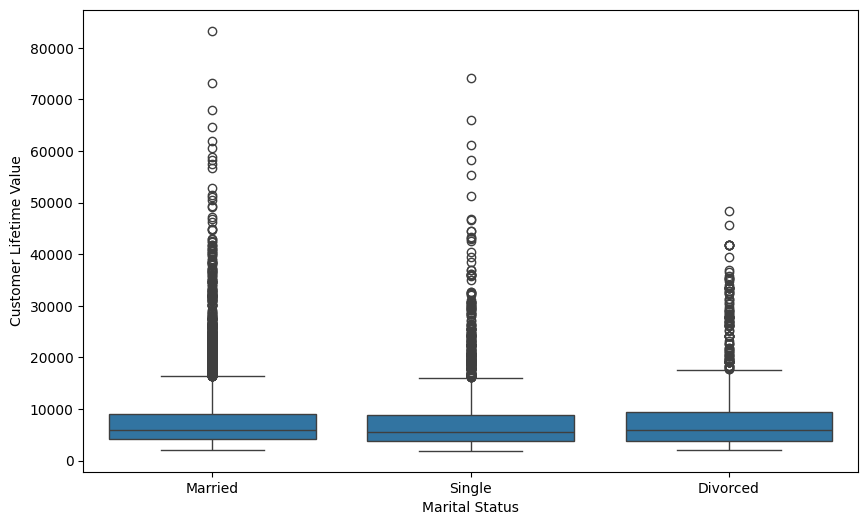

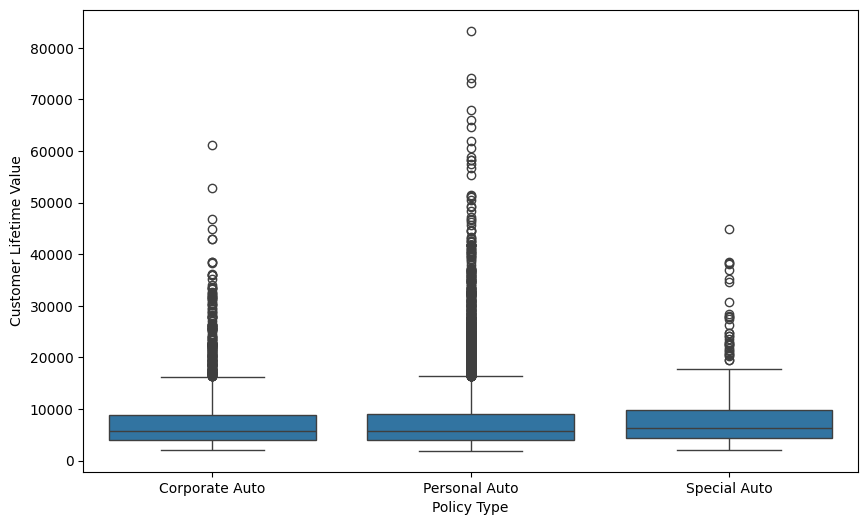

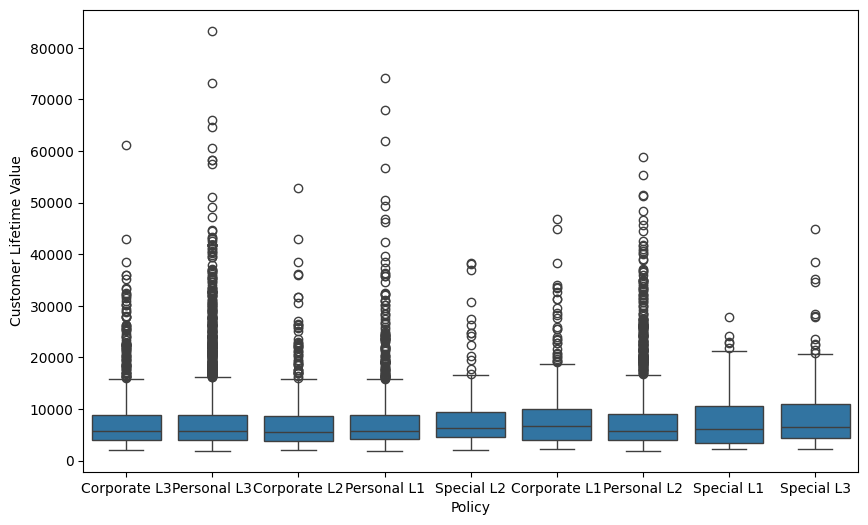

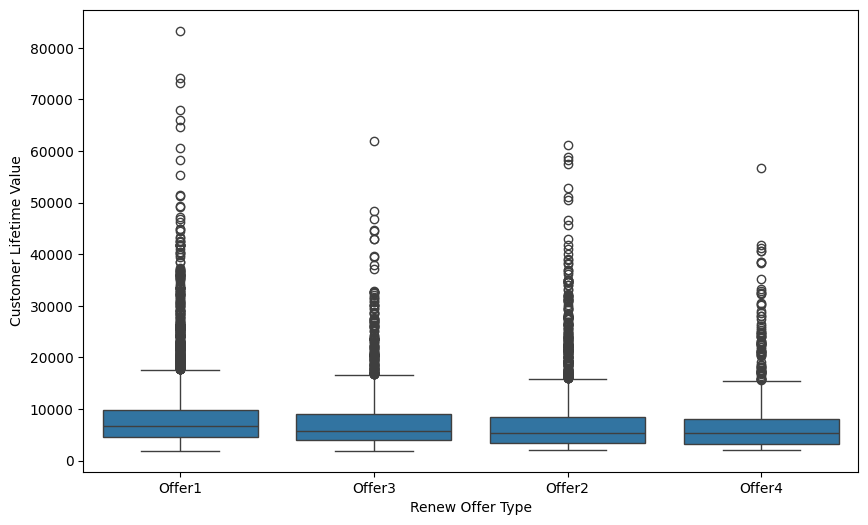

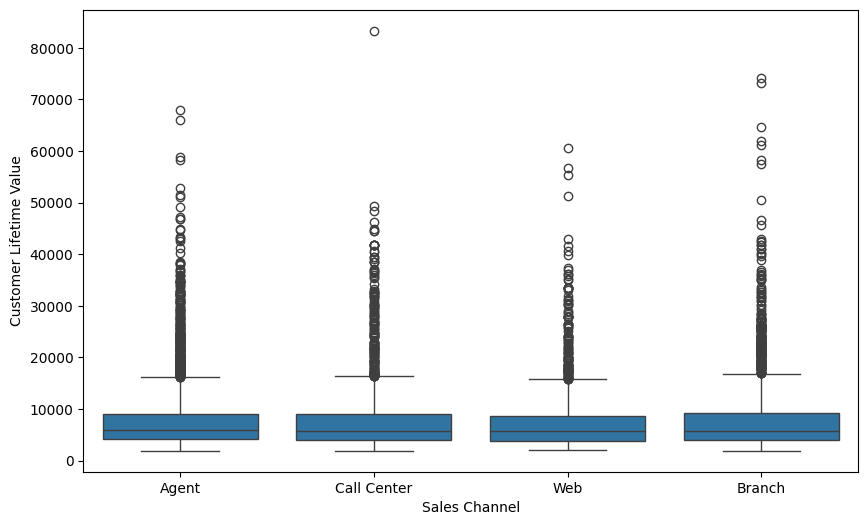

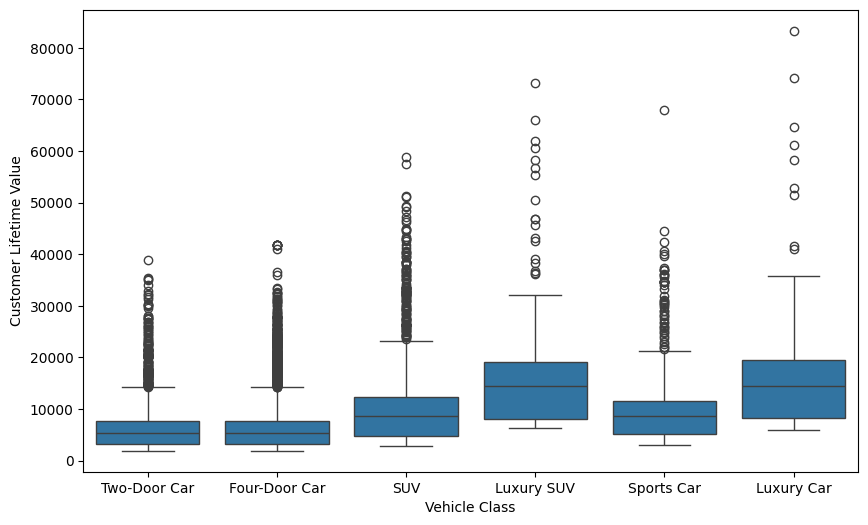

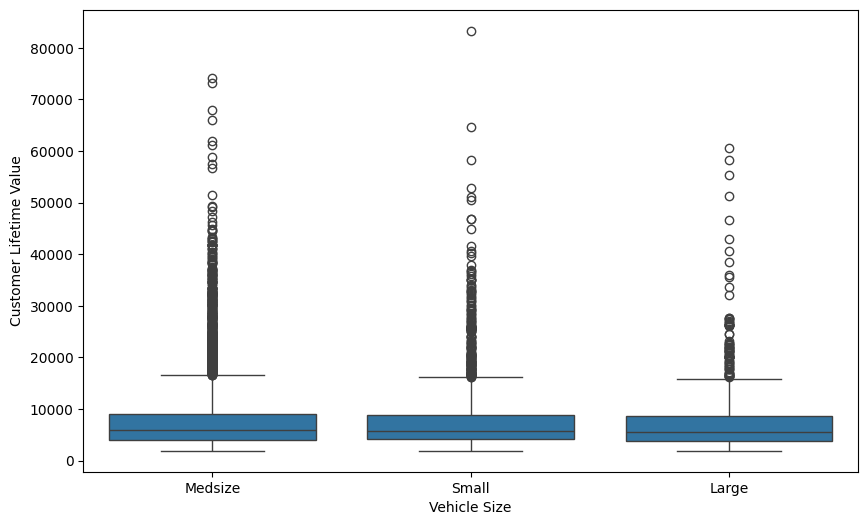

In [142]:
for col in df.select_dtypes(include=['object']).columns:
  if col != 'Customer Lifetime Value':
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='Customer Lifetime Value', data=df)



In [143]:
df.isnull().sum()

,0
State,0
Customer Lifetime Value,0
Response,0
Coverage,0
Education,0
EmploymentStatus,0
Gender,0
Income,0
Location Code,0
Marital Status,0


In [144]:
df.dtypes

,0
State,object
Customer Lifetime Value,float64
Response,object
Coverage,object
Education,object
EmploymentStatus,object
Gender,object
Income,int64
Location Code,object
Marital Status,object


In [145]:

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate through object columns (excluding 'Customer Lifetime Value')
for col in df.select_dtypes(include=['object']).columns:
  if col != 'Customer Lifetime Value':
    # Fit and transform the column using LabelEncoder
    df[col] = le.fit_transform(df[col])

# Display the updated DataFrame with label encoded columns
df.head()


,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,4,2763.519279,0,0,0,1,0,56274,1,1,...,5,0,1,0,2,0,0,384.811147,5,1
1,0,6979.535903,0,1,0,4,0,0,1,2,...,42,0,8,1,5,2,0,1131.464935,0,1
2,2,12887.431650,0,2,0,1,0,48767,1,1,...,38,0,2,1,5,0,0,566.472247,5,1
3,1,7645.861827,0,0,0,4,1,0,1,1,...,65,0,7,0,1,0,2,529.881344,3,1
4,4,2813.692575,0,0,0,1,1,43836,0,2,...,44,0,1,1,3,0,0,138.130879,0,1


In [146]:
df.dtypes

,0
State,int64
Customer Lifetime Value,float64
Response,int64
Coverage,int64
Education,int64
EmploymentStatus,int64
Gender,int64
Income,int64
Location Code,int64
Marital Status,int64


In [147]:
df.corr(numeric_only=True)

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
State,1.000000,0.008778,-0.002473,0.002047,0.015755,0.000368,-0.004933,0.004620,-0.005240,0.020371,...,0.013965,-0.000021,-0.013866,0.008638,0.014241,-0.007194,-0.003080,0.005495,0.011407,0.006846
Customer Lifetime Value,0.008778,1.000000,-0.008930,0.168040,0.026038,-0.034846,-0.013610,0.024366,0.004854,-0.026003,...,0.009418,-0.036343,0.021955,0.020011,0.015217,-0.068548,-0.003941,0.226451,0.082307,0.017098
Response,-0.002473,-0.008930,1.000000,0.000642,0.000285,-0.016703,0.004396,0.011932,0.001729,-0.094843,...,0.002952,-0.009881,-0.020891,0.001110,-0.001461,-0.162882,-0.086607,0.016877,0.021225,-0.050691
Coverage,0.002047,0.168040,0.000642,1.000000,0.021573,0.003239,-0.014448,-0.010646,-0.020176,0.002956,...,0.010658,-0.007971,-0.013515,0.001469,-0.002317,-0.049092,-0.024638,0.279078,-0.017682,-0.003775
Education,0.015755,0.026038,0.000285,0.021573,1.000000,-0.025271,0.002206,0.018709,-0.011533,0.005675,...,0.004140,-0.023270,0.007266,0.011650,0.011119,0.067838,-0.005018,0.020730,0.010192,-0.005491
EmploymentStatus,0.000368,-0.034846,-0.016703,0.003239,-0.025271,1.000000,0.034960,-0.726741,0.015921,0.311563,...,0.015376,0.007045,0.005035,-0.002240,-0.001159,-0.121378,-0.018346,0.330465,-0.002443,-0.011253
Gender,-0.004933,-0.013610,0.004396,-0.014448,0.002206,0.034960,1.000000,-0.015138,0.003108,0.034027,...,0.004198,-0.003012,0.016258,-0.002227,-0.003123,0.045276,-0.020614,0.074564,0.020043,-0.000347
Income,0.004620,0.024366,0.011932,-0.010646,0.018709,-0.726741,-0.015138,1.000000,-0.027517,-0.231673,...,-0.000875,0.006408,-0.008656,0.002080,0.005032,0.139856,0.013494,-0.355254,0.004343,0.007945
Location Code,-0.005240,0.004854,0.001729,-0.020176,-0.011533,0.015921,0.003108,-0.027517,1.000000,0.016452,...,0.007030,-0.002697,0.003066,0.015096,0.012086,-0.023625,-0.003953,0.254766,0.001870,0.021230
Marital Status,0.020371,-0.026003,-0.094843,0.002956,0.005675,0.311563,0.034027,-0.231673,0.016452,1.000000,...,-0.029345,-0.000011,0.011664,0.013052,0.008139,-0.025818,-0.017967,0.204675,0.017597,0.017493


In [148]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression #Model

In [149]:
y=df[["Customer Lifetime Value"]]   # DV should be in y axis
X=df.drop(["Customer Lifetime Value"],axis=1)

In [150]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [151]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [152]:
model.score(X_train,y_train)

0.17253552763598745

In [153]:
model.score(X_test,y_test)

0.14181301103651045

In [161]:
from sklearn.tree import DecisionTreeRegressor
model_dtr=DecisionTreeRegressor(max_depth=5)
model_dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [162]:
model_dtr.score(X_train,y_train)

0.6933411740046871

In [156]:
model_dtr.score(X_test,y_test)

0.6560801888672491

In [157]:
from sklearn.ensemble import BaggingRegressor
model_bg=BaggingRegressor()
model_bg.fit(X_train,y_train)   # 0.93,0.68

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:568: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



BaggingRegressor()

In [186]:
from sklearn.ensemble import AdaBoostRegressor # 52,47

In [187]:
from sklearn.ensemble import GradientBoostingRegressor #0.73,0.68

In [188]:
from sklearn.ensemble import RandomForestRegressor #0.95,0.68

<Axes: xlabel='Customer Lifetime Value'>

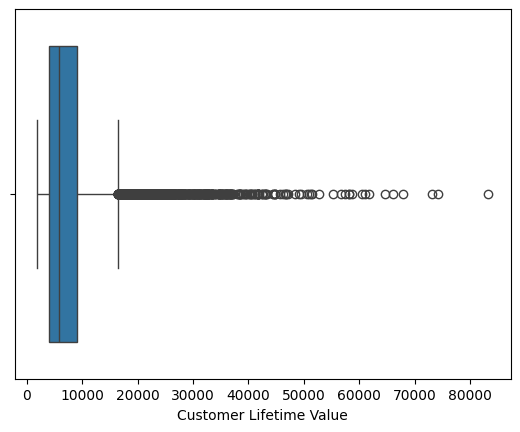

In [163]:
sns.boxplot(x="Customer Lifetime Value",data=df)

In [164]:
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    return df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

In [165]:
df=remove_outliers_iqr(df)

<Axes: xlabel='Customer Lifetime Value'>

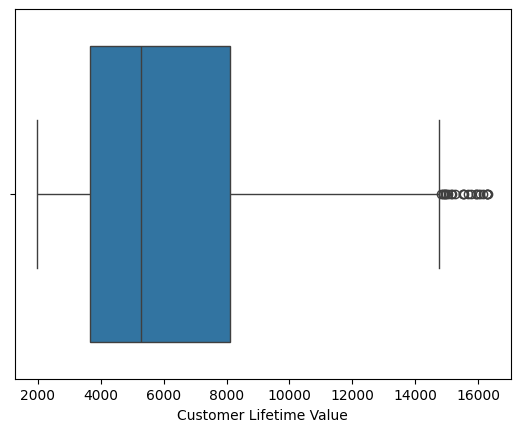

In [166]:
sns.boxplot(x="Customer Lifetime Value",data=df)

In [167]:
y=df[["Customer Lifetime Value"]]   # DV should be in y axis
X=df.drop(["Customer Lifetime Value"],axis=1)

In [168]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [169]:
model.score(X_train,y_train)

0.23078987149296115

In [170]:
model.score(X_test,y_test)

0.3098911331236802

In [183]:
model_dtr=DecisionTreeRegressor(max_depth=6)
model_dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=6)

In [184]:
model_dtr.score(X_train,y_train)

0.9256412648927597

In [185]:
model_dtr.score(X_test,y_test)

0.9259866167221829

In [228]:
from sklearn.ensemble import BaggingRegressor
model_bg=BaggingRegressor(n_estimators=100,max_samples=0.20)
model_bg.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_bagging.py:568: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



BaggingRegressor(max_samples=0.2, n_estimators=100)

In [229]:
model_bg.score(X_train,y_train)

0.930666968350274

In [230]:
model_bg.score(X_test,y_test)

0.9202818741996874

In [241]:
model_ab=AdaBoostRegressor(n_estimators=100)
model_ab.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



AdaBoostRegressor(n_estimators=100)

In [242]:
model_ab.score(X_train,y_train)

0.8516724486331316

In [243]:
model_ab.score(X_test,y_test)

0.8611204534308348

In [253]:
model_gbc=GradientBoostingRegressor(n_estimators=100)
model_gbc.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GradientBoostingRegressor()

In [254]:
model_gbc.score(X_train,y_train)

0.9494136170108456

In [255]:
model_gbc.score(X_test,y_test)

0.9361391245504062

In [277]:
model_rfr=RandomForestRegressor(n_estimators=10,max_depth=8,max_features=10)
model_rfr.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(max_depth=8, max_features=10, n_estimators=10)

In [278]:
model_rfr.score(X_train,y_train)

0.9581496136041237

In [279]:
model_rfr.score(X_test,y_test)

0.9348459194291501